In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


EDA

In [5]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
salary_train.shape,salary_test.shape

((30161, 14), (15060, 14))

In [8]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
salary_train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
salary_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,39,50,38,53,28,37,49,52,31,42
workclass,State-gov,Self-emp-not-inc,Private,Private,Private,Private,Private,Self-emp-not-inc,Private,Private
education,Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters,9th,HS-grad,Masters,Bachelors
educationno,13,13,9,7,13,14,5,9,14,13
maritalstatus,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-spouse-absent,Married-civ-spouse,Never-married,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial,Other-service,Exec-managerial,Prof-specialty,Exec-managerial
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife,Wife,Not-in-family,Husband,Not-in-family,Husband
race,White,White,White,Black,Black,White,Black,White,White,White
sex,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male
capitalgain,2174,0,0,0,0,0,0,0,14084,5178


In [12]:
salary_test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [13]:
salary_test.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,25,38,28,44,34,63,24,55,65,36
workclass,Private,Private,Local-gov,Private,Private,Self-emp-not-inc,Private,Private,Private,Federal-gov
education,11th,HS-grad,Assoc-acdm,Some-college,10th,Prof-school,Some-college,7th-8th,HS-grad,Bachelors
educationno,7,9,12,10,6,15,10,4,9,13
maritalstatus,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,Other-service,Prof-specialty,Other-service,Craft-repair,Machine-op-inspct,Adm-clerical
relationship,Own-child,Husband,Husband,Husband,Not-in-family,Husband,Unmarried,Husband,Husband,Husband
race,Black,White,White,Black,White,White,White,White,White,White
sex,Male,Male,Male,Male,Male,Male,Female,Male,Male,Male
capitalgain,0,0,0,7688,0,3103,0,0,6418,0


<Axes: xlabel='Salary', ylabel='count'>

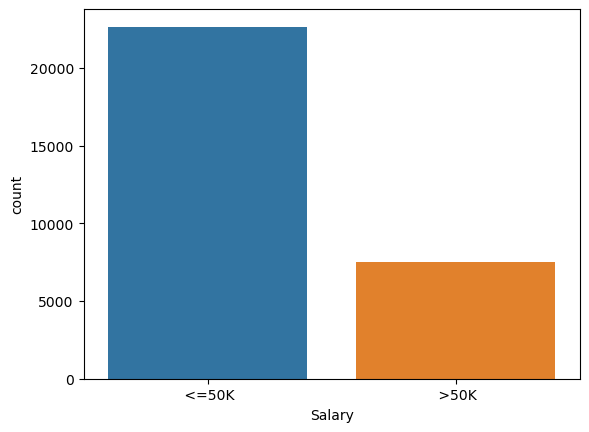

In [14]:
sns.countplot(x=salary_train['Salary'])

<Axes: xlabel='Salary', ylabel='count'>

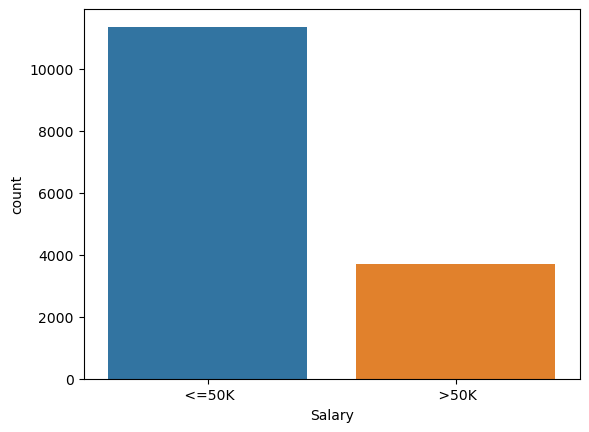

In [15]:
sns.countplot(x=salary_test['Salary'])

In [44]:
#above countplot shows that only 1/3rd of people recieve salary above 50k when compared to the group of people who recieves less\equal to 50k


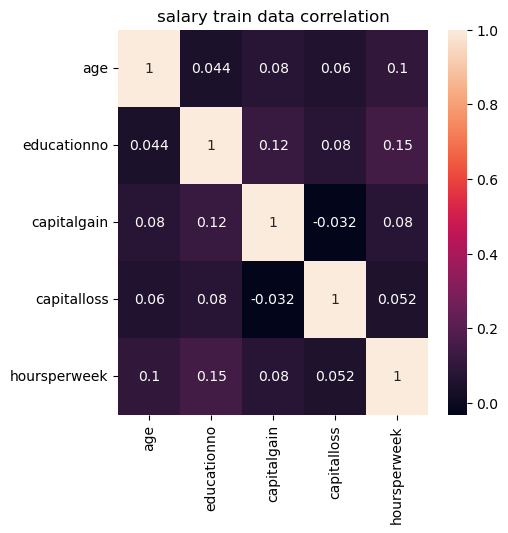

In [23]:
plt.figure(figsize=(5,5))
train=sns.heatmap(data=salary_train.corr(),annot=True)
plt.title("salary train data correlation")
plt.show()

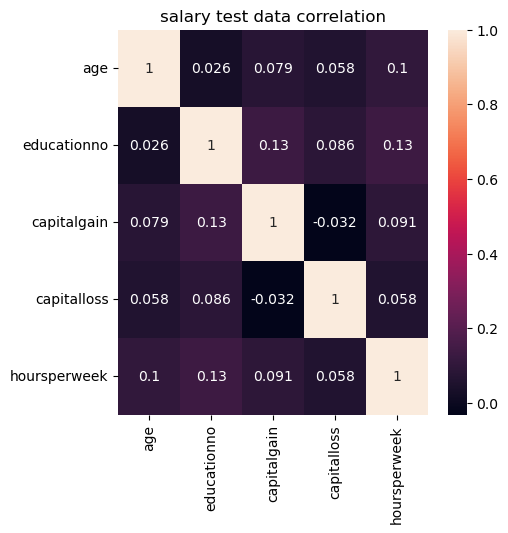

In [22]:
plt.figure(figsize=(5,5))
test=sns.heatmap(data=salary_test.corr(),annot=True)
plt.title("salary test data correlation")
plt.show()

<Figure size 900x600 with 0 Axes>

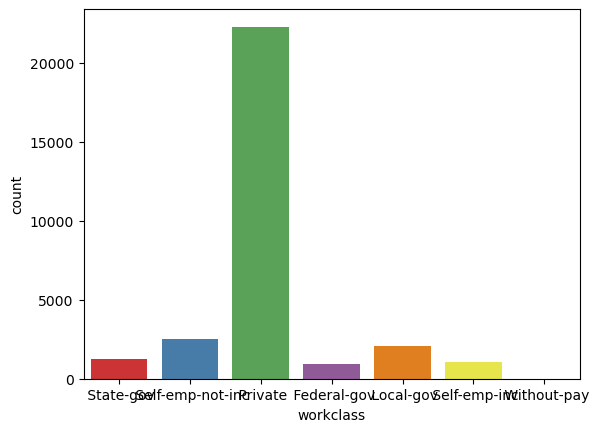

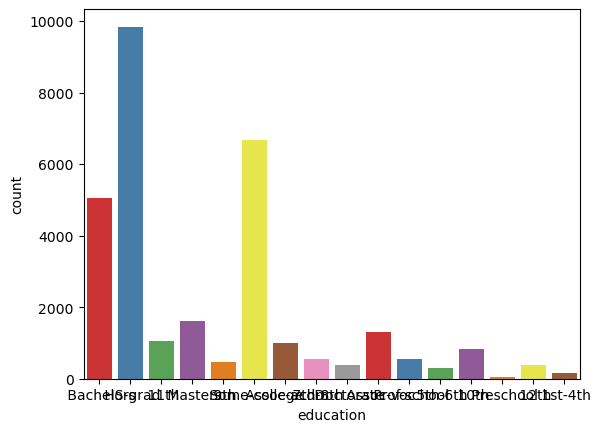

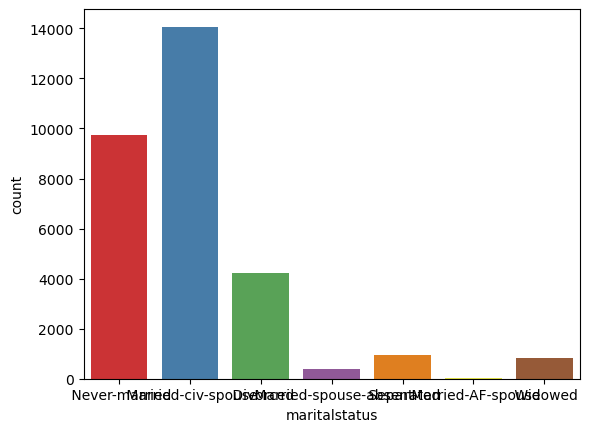

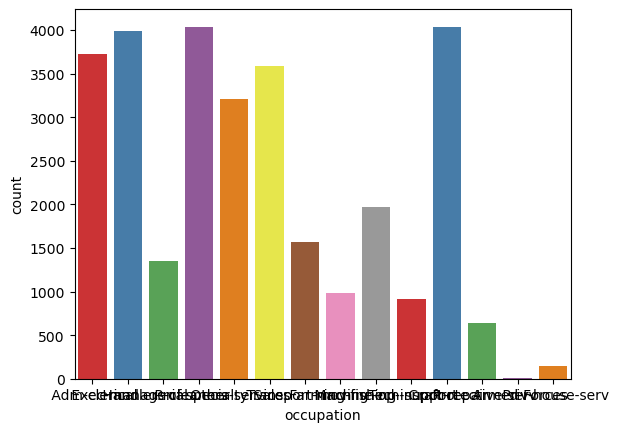

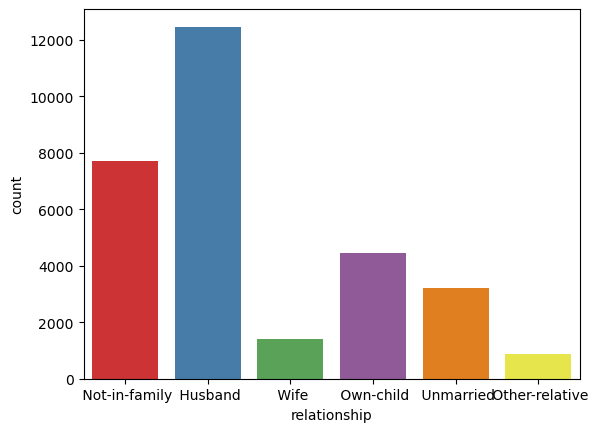

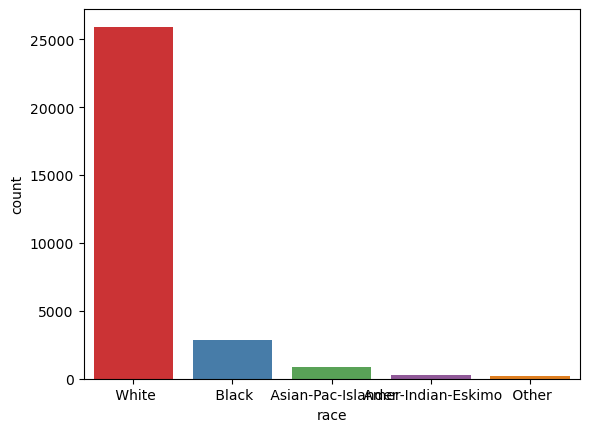

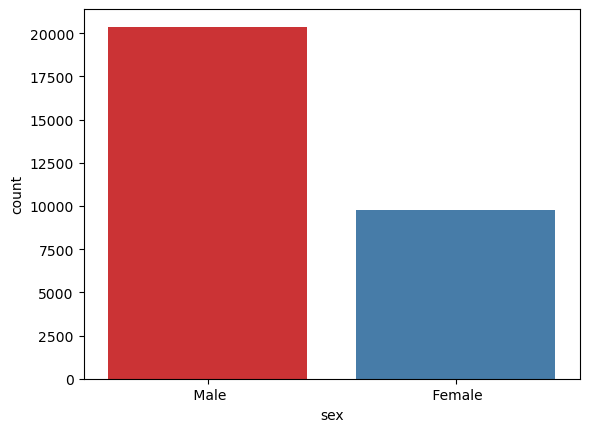

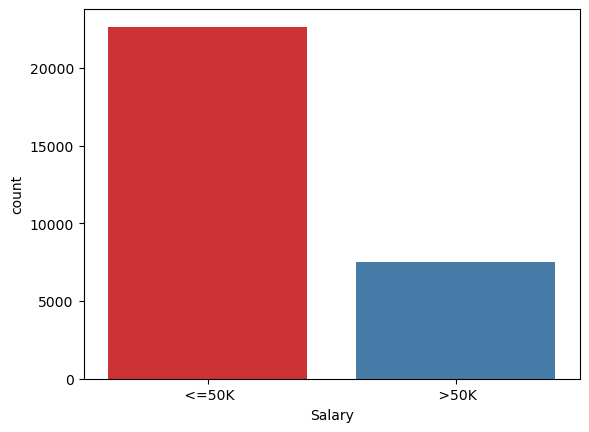

In [24]:
plt.figure(figsize=(9,6))
str_column = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in str_column:
    plt.figure() 
    sns.countplot (x=col,data = salary_train,palette = 'Set1')   

Data Preprocessing

In [26]:
leb=LabelEncoder()

In [27]:
labeling_features=salary_train.columns
labeling_features=labeling_features.drop(['age','educationno','capitalgain','capitalloss','hoursperweek'])

In [28]:
for i in labeling_features:
    salary_train[i]=leb.fit_transform(salary_train[i])
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [29]:
labeling_features=salary_test.columns
labeling_features=labeling_features.drop(['age','educationno','capitalgain','capitalloss','hoursperweek'])

In [30]:
for i in labeling_features:
    salary_test[i]=leb.fit_transform(salary_test[i])
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [31]:
scaler=MinMaxScaler()
train_scaled=scaler.fit_transform(salary_train)
train_scaled=pd.DataFrame(train_scaled,columns=salary_train.columns)
train_scaled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718,0.0
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1.0
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718,0.0
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718,0.0


In [32]:
test_scaled=scaler.fit_transform(salary_test)
test_scaled=pd.DataFrame(test_scaled,columns=salary_test.columns)
test_scaled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0.0


In [33]:
x_train=train_scaled.drop('Salary',axis=1)
y_train=train_scaled[['Salary']]

In [34]:
x_test=test_scaled.drop('Salary',axis=1)
y_test=test_scaled[['Salary']]

Using Multinomial Naive Bayes

In [35]:
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [36]:
y_pred=classifier.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.7596945551128818
confusion_matrix:
 [[11356     4]
 [ 3615    85]]


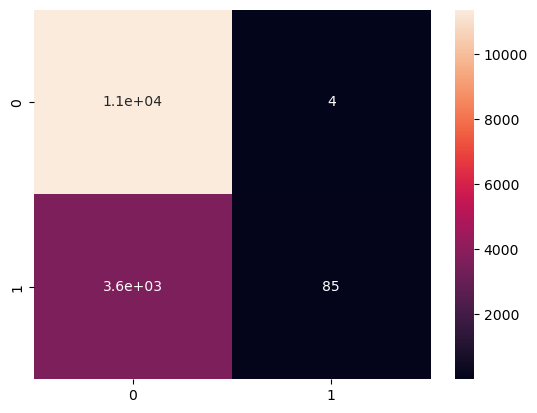

In [38]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

Using Gassian Naive Bayes

In [39]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [40]:
y_pred=classifier.predict(x_test)

In [41]:
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.796812749003984
confusion_matrix:
 [[10746   614]
 [ 2446  1254]]


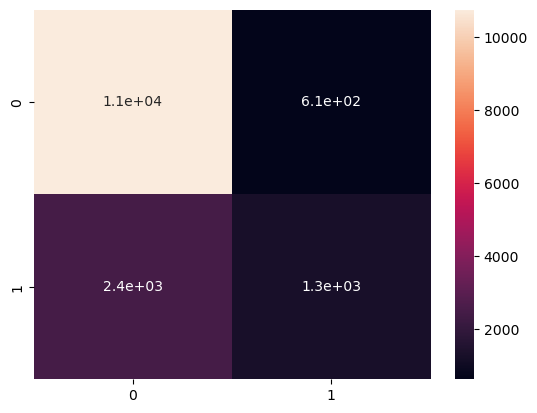

In [42]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [43]:
# from the above result gassian naive bayes give better accuracy(79)